<h3>Description</h3>

<b>This notebook demonstrates the feature selection process and a comparative analysis to evaluate model performance for each feature selection</b>

<b>This notebook is made according to the next instructions:</b>

1. Feature Selection based measurement:
- divide the data to train, validation, and test sets
- train a RF model with basic hyperparameters (max_depth = 4, trees = 100) on the train set
- fit explainability method (each one separately).
- for each explainability method (SHAP, LIME, Permutation, etc.) one should extract the global explanation in the form of "feature impact" (aggregation of all local feature impact).
- apply absolute value on the global explanation results to get the feature importance for each XAI method.
- sort the list to have the order of the least to the most important features.
- start an iterative process of eliminating the least important feature in each iteration and store the evaluation on the train, validation, and test sets (train will be store for reporting) - for classification store accuracy, precision, recall, auc. regression - MSE, MAE
- programmatically chose the best set of features based on a chosen evaluation metric (accuracy/ precision/ MSE...). you can do that by applying argmax operation. iteration here = number of features to eliminate.
- visualization: 
* each line represents the test score w.r.t each evaluation metric in each iteration. 
* the arg max is the displayed red vertical line in the following figure.
* print the final score- this is the score over the test set.
- after applying the process for each XAI method you should display the test score side by side

<h3>Libraries import</h3>

In [1]:
import sys
sys.path
sys.path.append("../")
sys.path.append("../../")

In [2]:
from sklearn.ensemble import RandomForestClassifier

from xai_compare.comparison import FeatureElimination 
from xai_compare.config import MODE
from xai_compare.datasets import german_credit


<h3>Feature selection demonstration</h3>

In [3]:
# define the model
model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

# create the FeatureElimination class with german_credit() dataset
feat_elimination = FeatureElimination(model, *german_credit(), mode=MODE.CLASSIFICATION, random_state=4, verbose=False)

Explainers: 100%|██████████| 3/3 [00:58<00:00, 19.48s/it]

SHAP


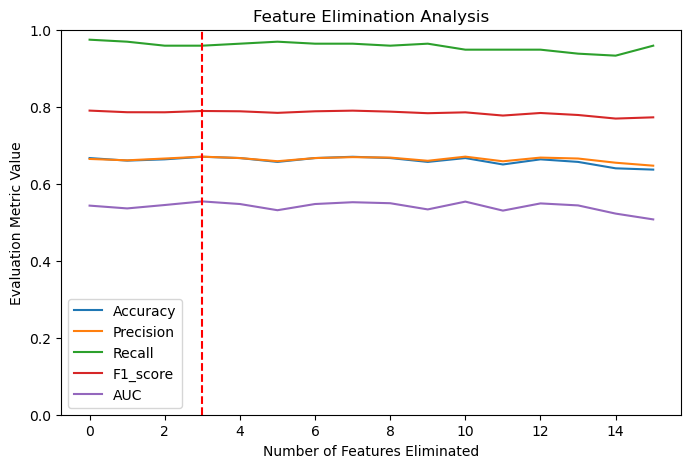

3 features are suggested to be removed
              train       val      test
Accuracy   0.830000  0.670000  0.730000
Precision  0.810384  0.670290  0.748663
Recall     0.997222  0.958549  0.952381
F1_score   0.894147  0.788913  0.838323
AUC        0.698611  0.554041  0.532794

LIME


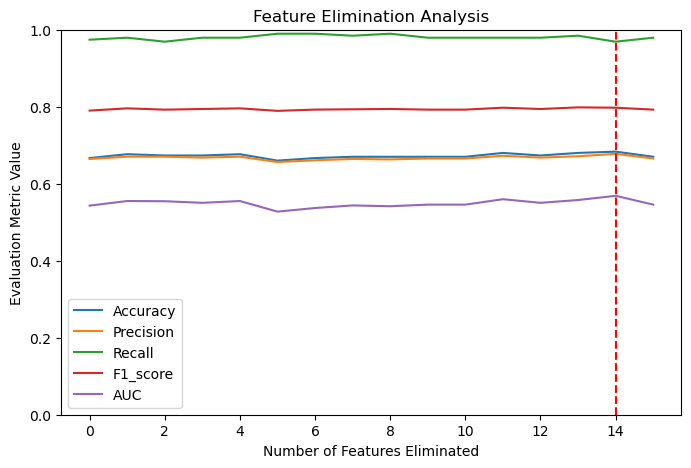

14 features are suggested to be removed
              train       val      test
Accuracy   0.766000  0.683333  0.720000
Precision  0.763557  0.677536  0.745946
Recall     0.977778  0.968912  0.938776
F1_score   0.857491  0.797441  0.831325
AUC        0.599603  0.568568  0.525992

PERMUTATIONFEATUREIMPORTANCE


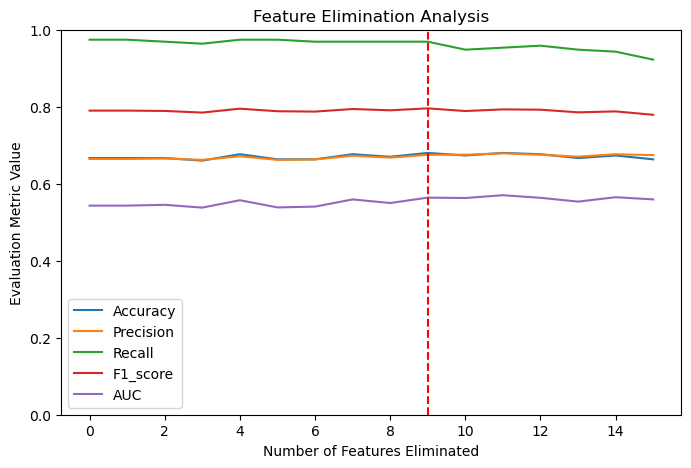

9 features are suggested to be removed
              train       val      test
Accuracy   0.822000  0.680000  0.750000
Precision  0.803132  0.675090  0.762162
Recall     0.997222  0.968912  0.959184
F1_score   0.889715  0.795745  0.849398
AUC        0.684325  0.563895  0.564497



Accuracy    0.75
dtype: float64

In [4]:
# calculate the best model result and visualize it
feat_elimination.best_result(visualization=True) #visualization=True

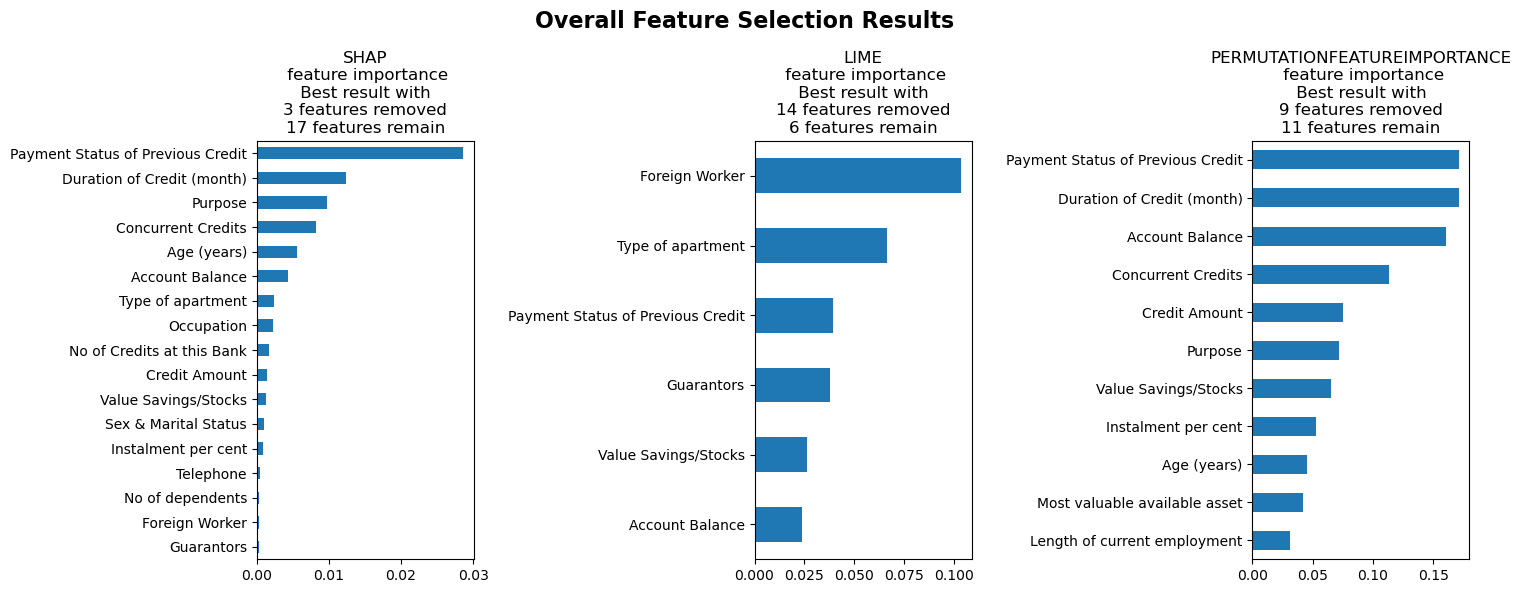

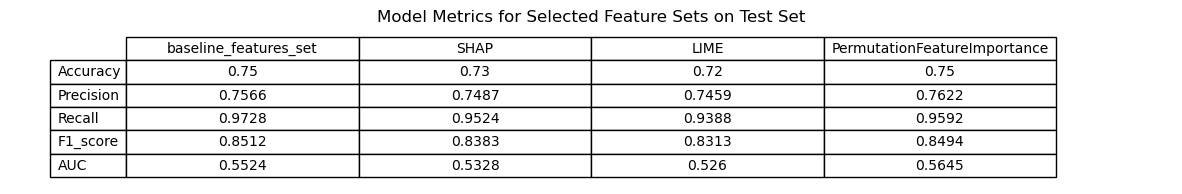

In [5]:
# * print the final score- this is the score over the test set.
feat_elimination.comparison_report()